<a href="https://colab.research.google.com/github/Alexandr-M-85/Neural-University/blob/main/%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F%20%D0%BF%D0%B0%D1%81%D1%81%D0%B0%D0%B6%D0%B8%D1%80%D0%BE%D0%B2%20%D0%BD%D0%B0%20%D0%B2%D1%85%D0%BE%D0%B4%D1%8F%D1%89%D0%B8%D1%85%20%D0%B8%20%D0%B2%D1%8B%D1%85%D0%BE%D0%B4%D1%8F%D1%89%D0%B8%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Используя базу "Пассажиры автобуса", подготовьте данные для обучения нейронной сети, классифицирующей изображение на два класса:
- входящий пассажир
- выходящий пассажир

Добейтесь точности работы модели на проверочной выборке не ниже 85%

Ссылка на датасет: https://storage.googleapis.com/terra_ai/DataSets/bus.zip

Информацию о загрузке изображений и преобразовании их в numnpy-массивы вы можете найти в Базе знаний:



---
Дополнительная информация ([База знаний УИИ - «**Загрузка изображений**»](https://colab.research.google.com/drive/1CRZInPkCF_IcZliPjcZt1ebnZP4bWiXy?usp=sharing))

---





In [ ]:
# Ваше решение
# импорт библиотек
import os
import numpy as np
import matplotlib.pyplot as plt           
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from sklearn.model_selection import train_test_split
from PIL import Image

In [ ]:
import gdown

gdown.download('https://storage.googleapis.com/terra_ai/DataSets/bus.zip', None, quiet=True)

'bus.zip'

In [ ]:
# распакуем архив и получим список в распакованной папке
!unzip -q '/content/bus.zip'

replace getting_off/00000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
# сформируем обучающую выборку
# создаем пустые листы
x = []
y = []

# проходим по изображениям входящих пассажиров
for filename in os.listdir('/content/entering'):
    # получаем имя файла
    img_name = f'./entering/{filename}'
    # открываем картинку
    img = Image.open(img_name)
    # меняем размер
    new_img = img.resize((100, 100))
    # преобразуем в массив numpy
    im2arr = np.array(new_img)
    # добавляем в выборку
    x.append(im2arr)
    y.append(0)

# проходим по изображениям входящих пассажиров
for filename in os.listdir('/content/getting_off'):
    # получаем имя файла
    img_name = f'./getting_off/{filename}'
    # открываем картинку
    img = Image.open(img_name)
    # меняем размер
    new_img = img.resize((100, 100))
    # преобразуем в массив numpy
    im2arr = np.array(new_img)
    # добавляем в выборку
    x.append(im2arr)
    y.append(1)

In [ ]:
# преобразуем выборки в массив numpy
x = np.array(x)
y = np.array(y)
# проверим размерности
print(x.shape)
print(y.shape)

(9081, 100, 100, 3)
(9081,)


In [ ]:
# так как картинки черно-белые, оставим только один цветовой канал
x = x[:,:,:,1]
x.shape

(9081, 100, 100)

In [ ]:
# Изменение формы входных картинок с 100х100 на 10000
x = x.reshape(x.shape[0], -1)
# Нормализация входных картинок
x = x.astype('float32') / 255.

In [ ]:
# разделим на обучающую и проверочную выборку
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

Epoch 1/100
103/103 [==============================] - 3s 7ms/step - loss: 1.0793 - accuracy: 0.6745 - val_loss: 0.8573 - val_accuracy: 0.7382
Epoch 2/100
103/103 [==============================] - 1s 5ms/step - loss: 0.5731 - accuracy: 0.7262 - val_loss: 0.4845 - val_accuracy: 0.7841
Epoch 3/100
103/103 [==============================] - 0s 5ms/step - loss: 0.5018 - accuracy: 0.7655 - val_loss: 0.4579 - val_accuracy: 0.7914
Epoch 4/100
103/103 [==============================] - 0s 5ms/step - loss: 0.4676 - accuracy: 0.7796 - val_loss: 0.4241 - val_accuracy: 0.8135
Epoch 5/100
103/103 [==============================] - 0s 5ms/step - loss: 0.4368 - accuracy: 0.8013 - val_loss: 0.3712 - val_accuracy: 0.8446
Epoch 6/100
103/103 [==============================] - 0s 5ms/step - loss: 0.3882 - accuracy: 0.8320 - val_loss: 0.6461 - val_accuracy: 0.6758
Epoch 7/100
103/103 [==============================] - 0s 5ms/step - loss: 0.3958 - accuracy: 0.8258 - val_loss: 0.3444 - val_accuracy: 0.8465

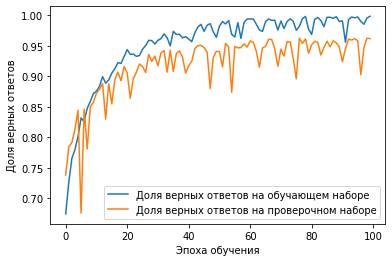

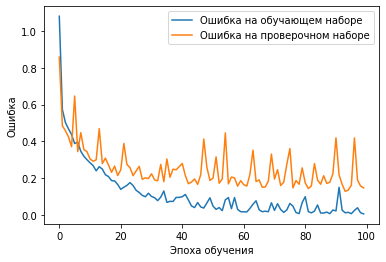

In [ ]:
# модель
model = Sequential()

# добавление слоев
model.add(Dense(1024, input_dim=10000, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# компилируем модель
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# обучаем модель
history = model.fit(x_train, y_train, batch_size=64, epochs=100, validation_split=0.2)

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

# рисуем графики
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [ ]:
# Вычисление результата (предсказания) сети на тестовом наборе
scores = model.evaluate(x_test, y_test, verbose=1)

print(scores)
print('Доля верных ответов на тестовых данных, в процентах: {:7.4%}'.format(scores[1]))

29/29 [==============================] - 0s 2ms/step - loss: 0.1250 - accuracy: 0.9681
[0.12495796382427216, 0.9680967926979065]
Доля верных ответов на тестовых данных, в процентах: 96.8097%


Выходящий пассажир


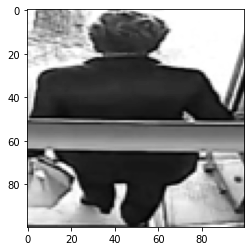

In [ ]:
# проверка
n = 653
plt.imshow((x_test[n]*255).reshape(100, 100), cmap='gray')
if model.predict(x_test[n].reshape(-1, 10000)) < 0.5:
    print('Входящий пассажир')
else:
    print('Выходящий пассажир')

Входящий пассажир


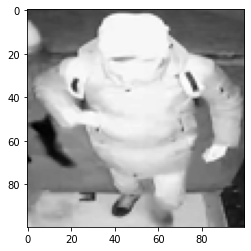

In [ ]:
# проверка
n = 123
plt.imshow((x_test[n]*255).reshape(100, 100), cmap='gray')
if model.predict(x_test[n].reshape(-1, 10000)) < 0.5:
    print('Входящий пассажир')
else:
    print('Выходящий пассажир')